**Diabetes Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Pregnancies:** Number of times pregnant

**Glucose:**Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction:** Diabetes pedigree function

**Age:** Age (years)

**Outcome:** Class variable (0 or 1)

In [1]:
# import the libraries here
import pandas as pd
import numpy as np

In [2]:
#load the tips dataset in a dataframe
data = pd.read_csv('./diabetes.csv')

# **What does the dataset looks like?**

In [3]:
# show the dataset
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
#show the datatypes of the columns
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# show statistical details of dataset
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# **1. Plotting Data Distribution**

For each column from diabetes dataset, plot the data distribution using some library (seaborn, pandas) and describe what kind of distribution the data is following and what it tells about the data.

In [6]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

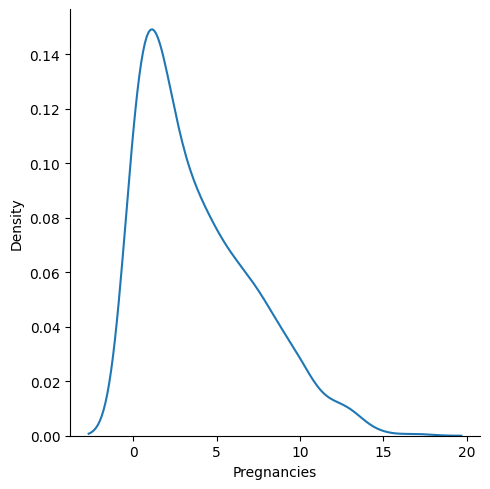

In [7]:
# data distribution for Pregnancies Column
sns.displot(data, x="Pregnancies", kind="kde")

**Explanation:**

Pregnancies column shows the count of pregnancies for each instance. From its plot above, it is shown that this count is normally distributed at around 3. Moreover, the region after mean has more density meaning that data is skewed on the right portion of the distribution.

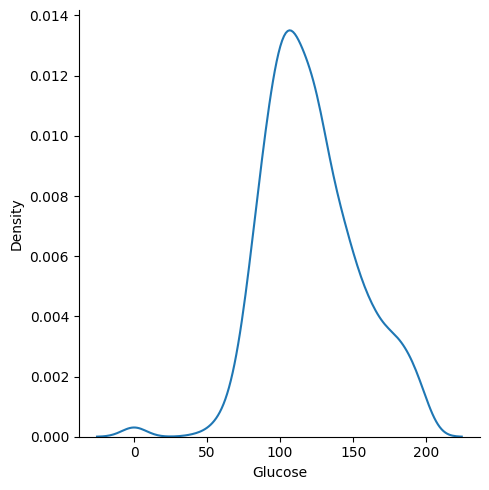

In [8]:
# data distribution for Glucose Column
sns.displot(data, x="Glucose", kind="kde")

**Explanation:**

The glucose column contains continuous values of glucose level. From its density distribution plot above, it is shown that the values are distributed around a mean greater than 100. Moreover, the graph after mean is a little bit skewed showing more density of values in this region.

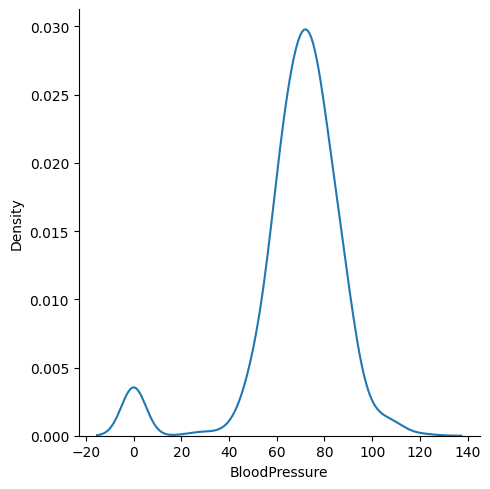

In [9]:
# data distribution for BloodPressure Column
sns.displot(data, x="BloodPressure", kind="kde")

**Explanation:**

For the blood pressure measure, which is continuous range, the distribution of values is around two points. First distribution is around 0 and the second is around some value close to 80. Moreover, the first point only contains small density but the second contains much higher density of values.

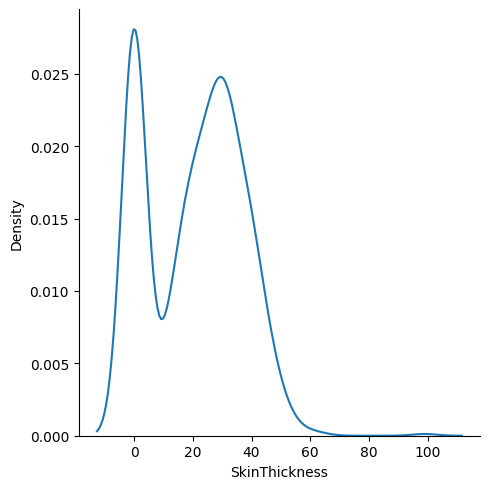

In [10]:
# data distribution for SkinThickness Column
sns.displot(data, x="SkinThickness", kind="kde")

**Explanation:**

Skin thickness is also distbuted around two values. Moreover, the graph is right skewed having greater density.

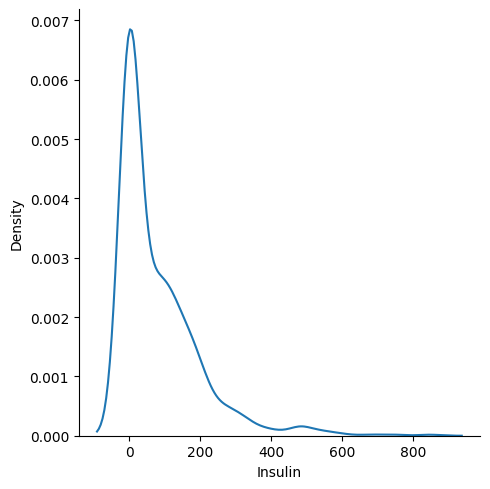

In [11]:
# data distribution for Insulin Column
sns.displot(data, x="Insulin", kind="kde")

**Explanation:**

Insulin distribution is around mean of around 80 with higher density of values in right region.

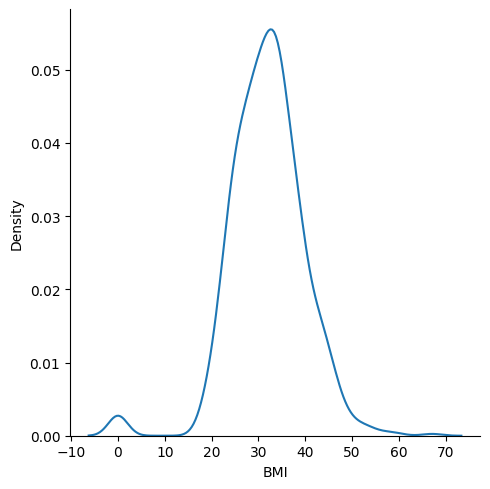

In [12]:
# data distribution for BMI Column
sns.displot(data, x="BMI", kind="kde")

**Explanation:**

BMI distribution is around two points with first point covering only a small density while the higher density is in the second point where values are distributed around mean.

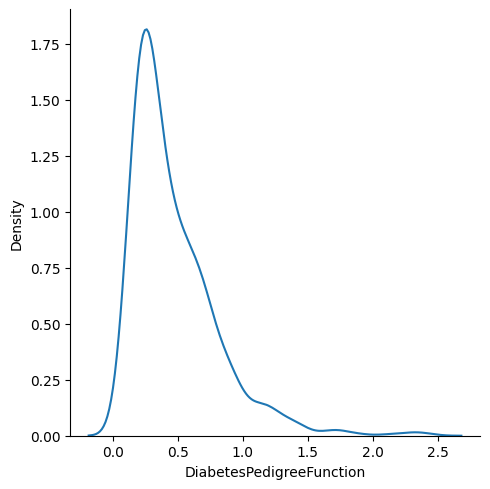

In [13]:
# data distribution for DiabetesPedigreeFunction Column
sns.displot(data, x="DiabetesPedigreeFunction", kind="kde")

**Explanation:**
 It has almost similar distribution to the insulin distribution.

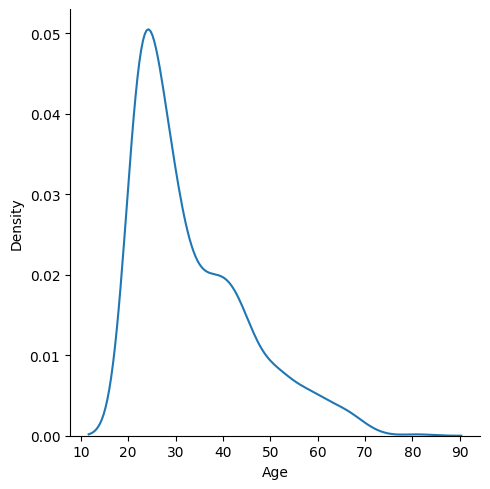

In [14]:
# data distribution for Age Column
sns.displot(data, x="Age", kind="kde")

**Explanation:**

A normal distribution of age around mean value of around 30 with higher density in the left side. 

<Axes: xlabel='Outcome', ylabel='count'>

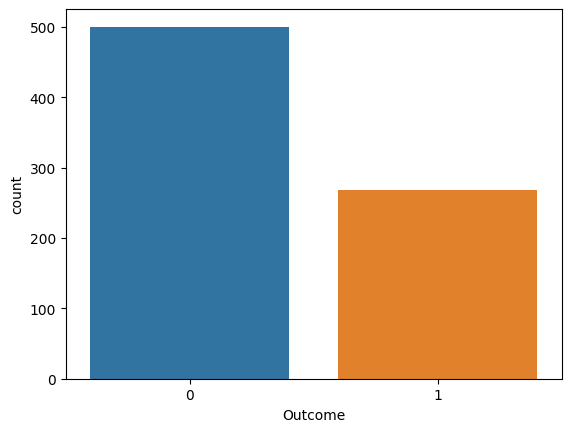

In [15]:
# data distribution for Outcome Column
sns.countplot(data, x="Outcome")

**Explanation:**

From the frequency counts of class labels, it is shown that data is imbalanced. meaning that one class label has much higher instances than other. 

# **2. Correlation Calculation**

Create a function correlation() which calculates the correlation of all columns with respect to Outcome column. Also explain what kind of correlation exist between Outcome column and other columns. Furthermore, plot the calculated correlation. Use the following formula to create correlation:

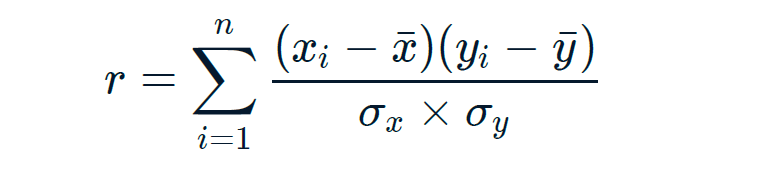

In [16]:
# define correlation function
def correlation(col1, col2):
  mean_1 = col1.mean()
  mean_2 = col2.mean()
  sum_numerator = 0
  sum_x = 0
  sum_y = 0
  for i in range(len(col1)):
    x_term = col1[i] - mean_1
    y_term = col2[i] - mean_2
    sum_numerator += x_term * y_term
    sum_x += x_term**2
    sum_y += y_term**2
  r = sum_numerator / np.sqrt(sum_x * sum_y)
  return r

In [17]:
# calling the correlation function and printing result
corr = []
col_names = []
for col in data:
  if col != 'Outcome':
    col_names.append(col)
    corr.append(correlation(data[col], data['Outcome']))
print(corr)

[0.2218981530339883, 0.4665813983068757, 0.06506835955033308, 0.07475223191831948, 0.13054795488404808, 0.2926946626444467, 0.1738440656529609, 0.23835598302719743]


[Text(0, 0, 'Pregnancies'),
 Text(1, 0, 'Glucose'),
 Text(2, 0, 'BloodPressure'),
 Text(3, 0, 'SkinThickness'),
 Text(4, 0, 'Insulin'),
 Text(5, 0, 'BMI'),
 Text(6, 0, 'DiabetesPedigreeFunction'),
 Text(7, 0, 'Age')]

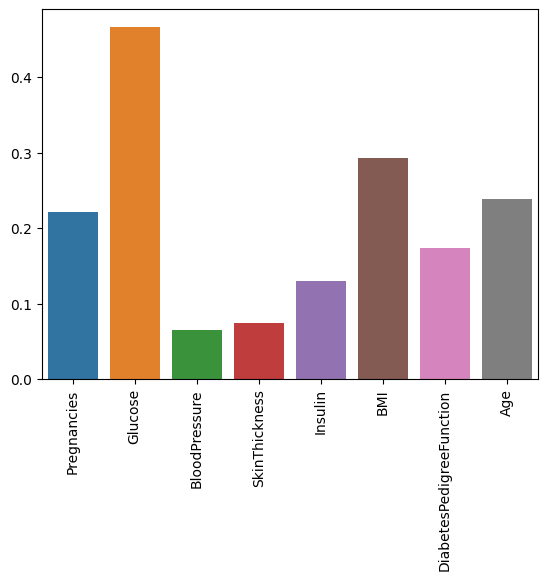

In [18]:
# visualize the calculated correlation result
ax = sns.barplot(x=col_names, y=corr)
ax.set_xticklabels(col_names, rotation=90)

**Explanation:**

With highest correlation, glucose column is strongly affecting the outcome. Moreover, the blood pressure with lowest correlation has less affect on outcome class label.

# **3. Multivariate Correlation Calculation**

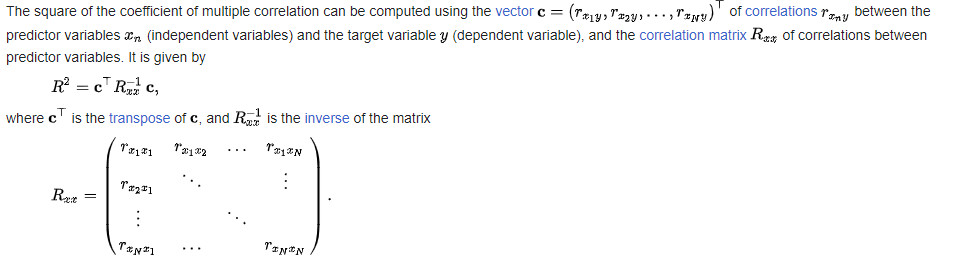

In [22]:
# Correlation between BloodPressure, SkinThickness and Outcome.
col_list = ['BloodPressure', 'SkinThickness', 'Outcome']
multi_corr_1 = np.zeros(9)
multi_corr_1 = multi_corr_1.reshape((3, 3))
for row in range(3):
  for col in range(3):
    multi_corr_1[row][col] = correlation(data[col_list[row]], data[col_list[col]])
print(multi_corr_1)

[[1.         0.20737054 0.06506836]
 [0.20737054 1.         0.07475223]
 [0.06506836 0.07475223 1.        ]]


In [23]:
# Correlation between Pregnancies, Glucose, BMI, Age and Outcome.
col_list_2 = ['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']
multi_corr_2 = np.zeros(25)
multi_corr_2 = multi_corr_2.reshape((5, 5))
for row in range(5):
  for col in range(5):
    multi_corr_2[row][col] = correlation(data[col_list_2[row]], data[col_list_2[col]])
print(multi_corr_2)

[[1.         0.12945867 0.01768309 0.54434123 0.22189815]
 [0.12945867 1.         0.22107107 0.26351432 0.4665814 ]
 [0.01768309 0.22107107 1.         0.03624187 0.29269466]
 [0.54434123 0.26351432 0.03624187 1.         0.23835598]
 [0.22189815 0.4665814  0.29269466 0.23835598 1.        ]]


# **4. T-Test Calculation**

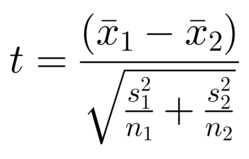

In [27]:
# divide the dataset in 2 groups, First where outcome is 0 and second where the outcome is 1
grouped = data.groupby(['Outcome'])
class_0 = grouped.get_group(0)
class_1 = grouped.get_group(1)
class_0

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
1                       0.351   31        0  
3                       0.167   21        0  
5                       0.201   30        0  
7                       0.134   29        0  
10                      0.191   30        0  
..                        ...  ...      ...  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
767                     0.315   23        0  

[500 rows x 9 columns]

In [31]:
# calculate the t-score between group 1 and group 2 using Glucose Column
group_1 = list(data.loc[data['Outcome'] == 1]['Glucose'])
group_2 = list(data.loc[data['Outcome'] == 0]['Glucose'])
mean_g1 = np.mean(group_1)
mean_g2 = np.mean(group_2)
std_g1 = (np.std(group_1))**2
std_g2 = (np.std(group_2))**2
t_score = (mean_g1 - mean_g2) / np.sqrt( ( std_g1/len(group_1) ) + ( std_g2/len(group_2) ) )
# t_score
print(len(group_1))

268


**Identify the Critical t-score for Glucose column**


Use the following table to identify the Critical t-score

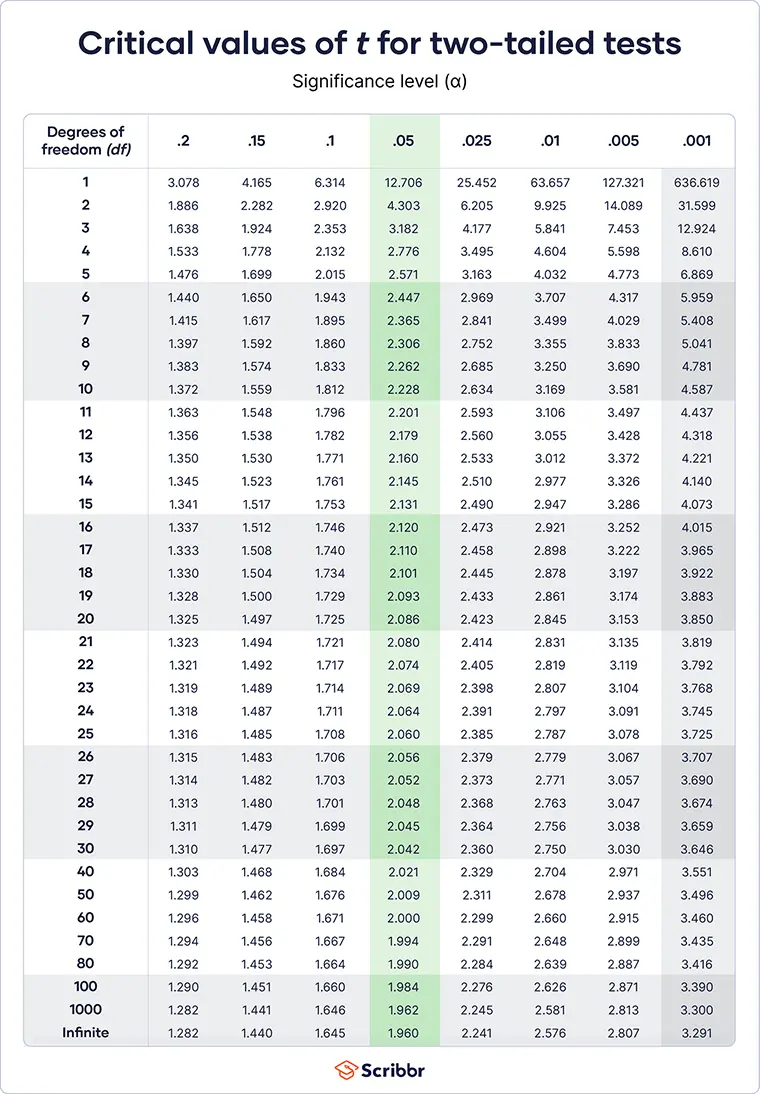

[Further Reading](https://www.scribbr.com/statistics/students-t-table/)

**Compare the Calculated t-score with Critical t-score**

The df value is 534 with alpha value of 0.05, the critical score is 1.962. It shows that the null hypothesis is not correct. It means that in the two groups of outcome, on the basis of class label, the mean of glucose is not same.


# **5. Regression Graph**

<Axes: xlabel='Age', ylabel='BMI'>

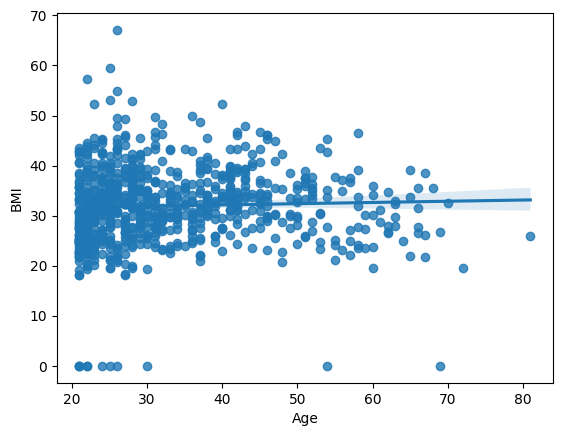

In [ ]:
# Create a regression graph of Age and BMI
sns.regplot(x='Age', y='BMI', data=data)

<Axes: xlabel='Glucose', ylabel='Outcome'>

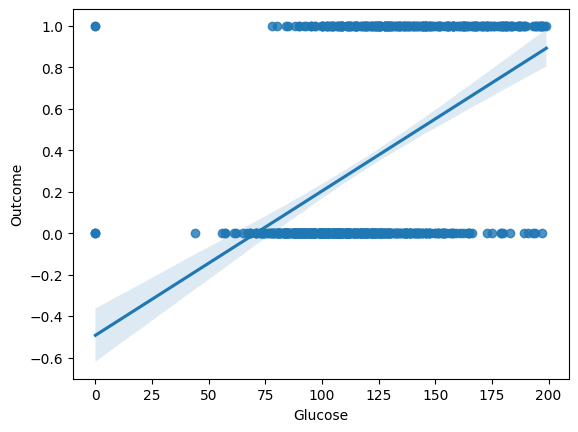

In [ ]:
# Create a regression graph of Glucose and Outcome
sns.regplot(x='Glucose', y='Outcome', data=data)